In [2]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install plotly

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler
import plotly.express as px

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
np.random.seed(0)

In [5]:
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

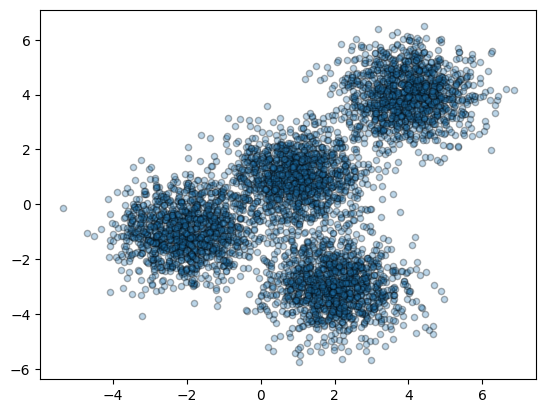

In [6]:
plt.scatter(X[:, 0], X[:, 1], marker='.',alpha=0.3,ec='k',s=80)

In [7]:
k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)

In [8]:
k_means.fit(X)

KMeans(n_clusters=4, n_init=12)

In [9]:
k_means_labels = k_means.labels_
k_means_labels

array([0, 3, 3, ..., 1, 0, 0], shape=(5000,), dtype=int32)

In [10]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_cluster_centers

array([[-2.03743147, -0.99782524],
       [ 3.97334234,  3.98758687],
       [ 0.96900523,  0.98370298],
       [ 1.99741008, -3.01666822]])

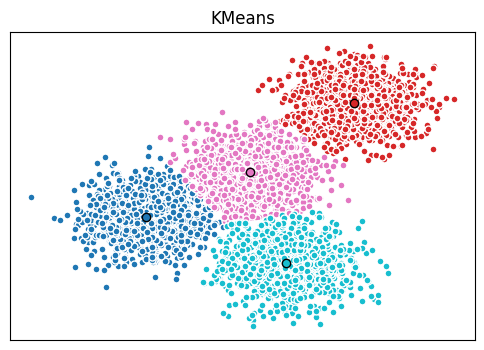

In [11]:
# Initialize the plot with the specified dimensions.
fig = plt.figure(figsize=(6, 4))

# Colors uses a color map, which will produce an array of colors based on
# the number of labels there are. We use set(k_means_labels) to get the
# unique labels.
colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means_labels))))

# Create a plot
ax = fig.add_subplot(1, 1, 1)

# For loop that plots the data points and centroids.
# k will range from 0-3, which will match the possible clusters that each
# data point is in.
for k, col in zip(range(len([[4, 4], [-2, -1], [2, -3], [1, 1]])), colors):

    # Create a list of all data points, where the data points that are 
    # in the cluster (ex. cluster 0) are labeled as true, else they are
    # labeled as false.
    my_members = (k_means_labels == k)

    # Define the centroid, or cluster center.
    cluster_center = k_means_cluster_centers[k]

    # Plots the datapoints with color col.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.',ms=10)

    # Plots the centroids with specified color, but with a darker outline
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# Title of the plot
ax.set_title('KMeans')

# Remove x-axis ticks
ax.set_xticks(())

# Remove y-axis ticks
ax.set_yticks(())

# Show the plot
plt.show()


In [ ]:
#Try to cluster the above dataset into a different number of clusters, 
#say k=3. Note the difference in the pattern generated.

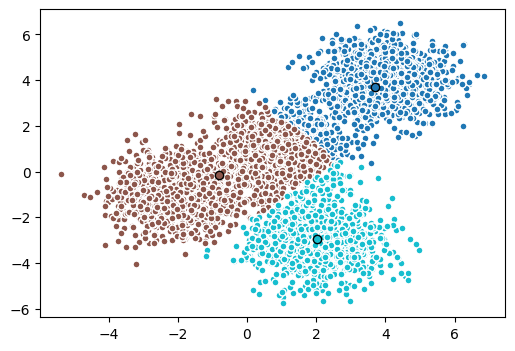

In [12]:
k_means3 = KMeans(init="k-means++", n_clusters=3, n_init=12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.',ms=10)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()

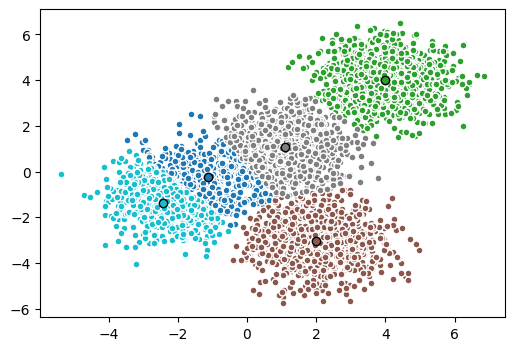

In [13]:
#Try the same with k=5.
k_means3 = KMeans(init="k-means++", n_clusters=5, n_init=12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.tab10(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.',ms=10)
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()

In [14]:
#For k=3, the value of within-cluster sum of squares will be higher that that for k=4,
#since the points from different natural clusters are being grouped together, leading to underfitting of the k-means model. 
#For k=5, the value of will be lesser than that for k=4, since the points are distributed into mode clusters than needed,
#leading to over-fitting of the k-means model.

In [15]:
cust_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv")
cust_df

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2
...,...,...,...,...,...,...,...,...,...,...
845,846,27,1,5,26,0.548,1.220,NaN,NBA007,6.8
846,847,28,2,7,34,0.359,2.021,0.0,NBA002,7.0
847,848,25,4,0,18,2.802,3.210,1.0,NBA001,33.4
848,849,32,1,12,28,0.116,0.696,0.0,NBA012,2.9


In [16]:
#As you can see, Address in this dataset is a categorical variable.
#The k-means algorithm doesn't work directly with categorical variables because the Euclidean distance function 
#isn't meaningful for them. You could one-hot encode the categorical feature, but for illustration purposes 
#let's run k-means clustering without it.

In [17]:
cust_df = cust_df.drop('Address', axis=1)

In [18]:
# Drop NaNs from the dataframe
cust_df = cust_df.dropna()
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 700 entries, 0 to 849
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      700 non-null    int64  
 1   Age              700 non-null    int64  
 2   Edu              700 non-null    int64  
 3   Years Employed   700 non-null    int64  
 4   Income           700 non-null    int64  
 5   Card Debt        700 non-null    float64
 6   Other Debt       700 non-null    float64
 7   Defaulted        700 non-null    float64
 8   DebtIncomeRatio  700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 54.7 KB


In [19]:
#After dropping NaNs we still have 700 rows out of the original 849. Let's proceed with this smaller data set.

In [21]:
#Now let's normalize the dataset. But why do we need normalization in the first place?
#Normalization is a statistical method that helps mathematical-based algorithms to interpret features
#with different magnitudes and distributions equally, tranforming the features so they have zero mean and standard deviation of one.
#We use StandardScaler() to normalize, or standardize our dataset.

X = cust_df.values[:,1:] # leaves out `Customer ID`
Clus_dataSet = StandardScaler().fit_transform(X)

In [22]:
#Modeling
#Write the code to cluster the data with k=3. Extract the cluster labels for this clustering process.
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(X)
labels = k_means.labels_

In [23]:
#We assign the k-means cluster labels to each row in the dataframe

cust_df["Clus_km"] = labels

In [24]:
#We can easily check the centroid values by averaging the features in each cluster.
#These values indicate the central point of the cluster from the vantage point of the field in question.

In [25]:
cust_df.groupby('Clus_km').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,439.80226,32.775895,1.632768,6.169492,30.642185,1.003795,2.090910,0.284369,10.146893
1,374.00000,44.785714,3.000000,17.857143,219.714286,6.115429,11.546357,0.285714,8.064286
2,403.56129,41.103226,1.916129,15.135484,81.122581,3.024935,5.605258,0.180645,10.848387


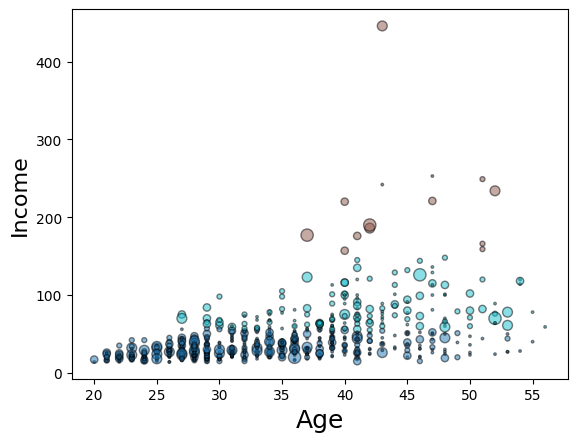

In [26]:
#Now, let's look at the distribution of customers based on their education, age and income. 
#We can choose to visualise this as a 2D scatter plot with Age on the x-axis, Income on the y-axis and the marker size representing education.
#The scatter points will be assigned different colors based on different class labels.
area = np.pi * ( X[:, 1])**2  
plt.scatter(X[:, 0], X[:, 3], s=area, c=labels.astype(float), cmap='tab10', ec='k',alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.show()

#s=area makes each point's size represent the education level, 
#so you can spot trends involving age, income, and education all in one plot!

In [28]:
#We can also see this distribution in 3 dimensions for better understanding.
#Here, the education parameter will represent the third axis instead of the marker size. 
# Create interactive 3D scatter plot
fig = px.scatter_3d(X, x=1, y=0, z=3, opacity=0.7, color=labels.astype(float))

fig.update_traces(marker=dict(size=5, line=dict(width=.25)), showlegend=False)
fig.update_layout(coloraxis_showscale=False, width=1000, height=800, scene=dict(
        xaxis=dict(title='Education'),
        yaxis=dict(title='Age'),
        zaxis=dict(title='Income')
    ))  # Remove color bar, resize plot

fig.show()


In [ ]:
#Create a profile for each group, considering the common characteristics of each cluster based on your observations above. 

...